# Week 3 CNN Cancer Detection Kaggle Mini-Project

#### Kaggle Competition Link:   [Link](https://www.kaggle.com/competitions/histopathologic-cancer-detection/overview)
#### GitHub Repository Link:    [Link](https://github.com/alysonlea/CNN-Cancer-Detection)


## Step One

**Breifly descripe the challenge problem and CNN. Describe the size, structure, etc., of the data.** <br><br>
**Problem Overview**
The competition involves creating an algorithm to identify metastatic cancer in small image patches taken from larger digital pathology scans. Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target. 

**CNN Overview**
A Convolutional Neural Network is a type of deep learning neural network particularly well-suited for tasks involving images, vieo and spatial data. CNNs have revolutionized the field of computer vision and have been widely applied in various domains including image classification, object detection, facial recognition, and medical imaging analysis. 
CNNs are composed of several layers stacked on top of eachother. These can include convolutional layers, pooling layers, and fully connected layers:
- Convolutional layers: the building blocks of CNNs; apply convolution operations to the input data using learnable filters to extract features; helps in capturing patterns and spacial hierarchies in the input data
- Pooling layers: interspersed between convolutional layers to progressively reduce the spatial dimensions of the input volume to reduce complexity and help with overfitting; ex. max pooling, average pooling
- Fully connected layers: present at the end of the network; make predictions based on the features extracted by earlier layers; perform classification or regression tasks

**Data Overview**
The data is a slightly modified version of the PCam benchmark dataset, with duplicates removed. The data provided is a large number of pathology images to classify. The train_labels.csv file provides the ground truth for the images in the train folder. Images provided in the test folder are for predicting labels. A positive label indicates that the center 32x32 pixel region of a patch contains at least one pixel of tumor tissue. Tumor tissue in the outer region does not influence the label, the outer region is provided to enable fully-convolutional models that do not use zero-padding. See below for a more in depth look at the different files data.

In [1]:
import os
import pandas as pd


In [2]:
# Look at the files in the folder
file_dir = '/Users/alyso/Downloads/histopathologic-cancer-detection/'
print(os.listdir(file_dir))

['sample_submission.csv', 'test', 'train', 'train_labels.csv']


In [3]:
# Look at the train_labels.csv data
labels = pd.read_csv(file_dir + 'train_labels.csv')
labels.head()

id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0

In [4]:
# Check the dimensions of the data
labels.shape

(220025, 2)

In [5]:

labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220025 entries, 0 to 220024
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      220025 non-null  object
 1   label   220025 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


In [6]:
# Bring in and check the first 5 files in the train and test folders
train_path = file_dir + 'train/'
test_path = file_dir + 'test/'

train = os.listdir(train_path)
test = os.listdir(test_path)

print(train[:5])
print(test[:5])

['00001b2b5609af42ab0ab276dd4cd41c3e7745b5.tif', '000020de2aa6193f4c160e398a8edea95b1da598.tif', '00004aab08381d25d315384d646f5ce413ea24b1.tif', '0000d563d5cfafc4e68acb7c9829258a298d9b6a.tif', '0000da768d06b879e5754c43e2298ce48726f722.tif']
['00006537328c33e284c973d7b39d340809f7271b.tif', '0000ec92553fda4ce39889f9226ace43cae3364e.tif', '00024a6dee61f12f7856b0fc6be20bc7a48ba3d2.tif', '000253dfaa0be9d0d100283b22284ab2f6b643f6.tif', '000270442cc15af719583a8172c87cd2bd9c7746.tif']


In [7]:
# Check the number of the training and test images
print('Train size: ', len(train))
print('Test size: ', len(test))

Train size:  220025
Test size:  57458


In [8]:
# Check the submission data
sub = pd.read_csv(file_dir + 'sample_submission.csv')
sub.head()

id  label
0  0b2ea2a822ad23fdb1b5dd26653da899fbd2c0d5      0
1  95596b92e5066c5c52466c90b69ff089b39f2737      0
2  248e6738860e2ebcf6258cdc1f32f299e0c76914      0
3  2c35657e312966e9294eac6841726ff3a748febf      0
4  145782eb7caa1c516acbe2eda34d9a3f31c41fd6      0

In [9]:
sub.shape

(57458, 2)

In [10]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57458 entries, 0 to 57457
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      57458 non-null  object
 1   label   57458 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 897.9+ KB


- train : contains the image files corresponding to the sample_sumbission.csv file
- test : contains the image files corresponding to the train_labels.csv file
- train_labels.csv : contains the train image file names and their classification, 0 indicating no cancer and 1 indicating cancer.
- sample_submission.csv : contains the test image file names, classification currently all are 0 and need to be updated with predictions before submission

## Step Two: Exploratory Data Analysis

**Show a few visualizations like histograms. Describe any data cleaning procedures. Based on your EDA, what is your plan of analysis?**


In [11]:
# Check the number of positive vs negative labels in the training set
labels['label'].value_counts()

label
0    130908
1     89117
Name: count, dtype: int64

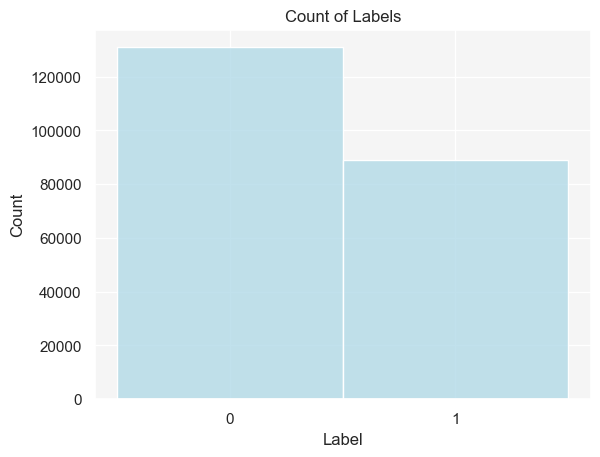

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visuzalize the labels
sns.set_theme(rc={"axes.facecolor":"whitesmoke","figure.facecolor":"white"})
plt.figure()
sns.histplot(data=labels, x='label', discrete=True, color="lightblue", bins=[0, 0.5, 1.5])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Labels')
plt.xticks([0, 1])  # Set x-ticks to show only 0 and 1
plt.show()


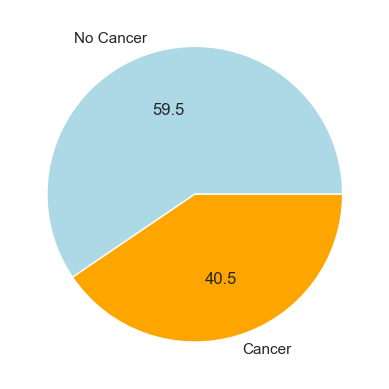

In [13]:
# Visuallize in a pie chart to better understand data distribution
plt.pie(labels.label.value_counts(), labels=['No Cancer', 'Cancer'], colors=['lightblue', 'orange'], autopct='%1.1f')
plt.show()

Last Image Specifications: Shape (96, 96) 
Format: {'compression': 'raw', 'dpi': (1, 1), 'resolution': (1, 1)}
27935 bytes on disk


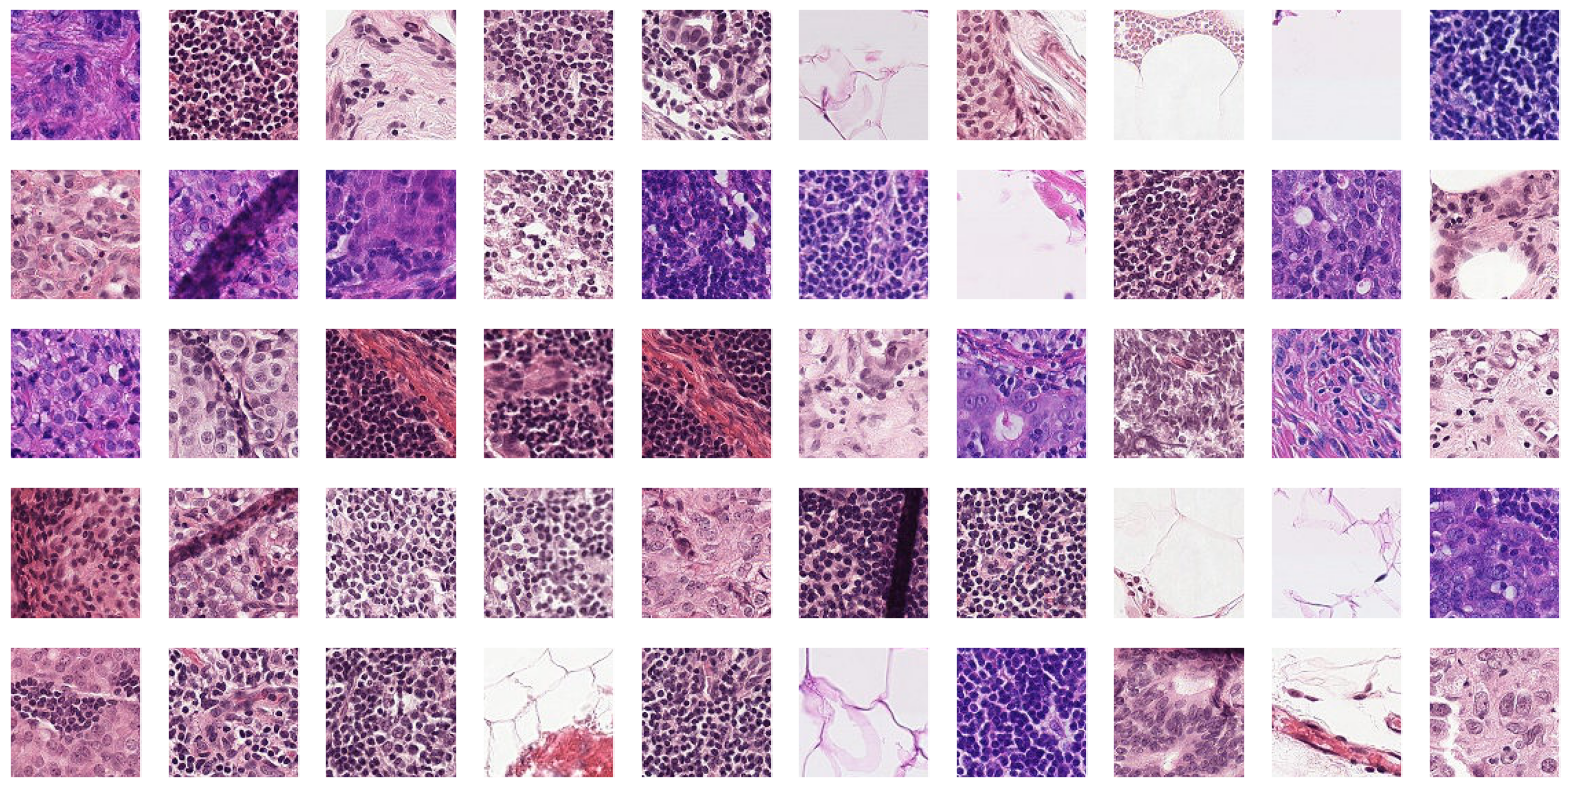

In [14]:
from PIL import Image
# Show some of the images
fig, ax = plt.subplots(5, 10, figsize=(20,10))

for n in range(5):
    for m in range(10):
        img_id = labels.id.sample(1).values[0]
        image = Image.open(train_path + img_id + ".tif")
        ax[n,m].imshow(image)
        ax[n,m].grid(False)
        ax[n,m].tick_params(labelbottom=False, labelleft=False)

        
# Look at some of the images and some info about the image files
print("Last Image Specifications: Shape", image.size, "\nFormat:", image.info)
print(os.stat('/Users/alyso/Downloads/histopathologic-cancer-detection/train/' + img_id + '.tif').st_size, "bytes on disk")


In [15]:
# Check the info about the submission image files 
sub_imid = sub.id.sample(1).values[0]
print("Last Image Specifications: Shape",image.size,"\nFormat:",image.info )
print(os.stat(test_path+sub_imid+'.tif').st_size, "bytes on disk")

Last Image Specifications: Shape (96, 96) 
Format: {'compression': 'raw', 'dpi': (1, 1), 'resolution': (1, 1)}
27935 bytes on disk


In [16]:
import numpy as np
# Get some malignant and benign images
positive_images = np.random.choice(labels[labels.label==1].id, size=50, replace=False)
negative_images = np.random.choice(labels[labels.label==0].id, size=50, replace=False)

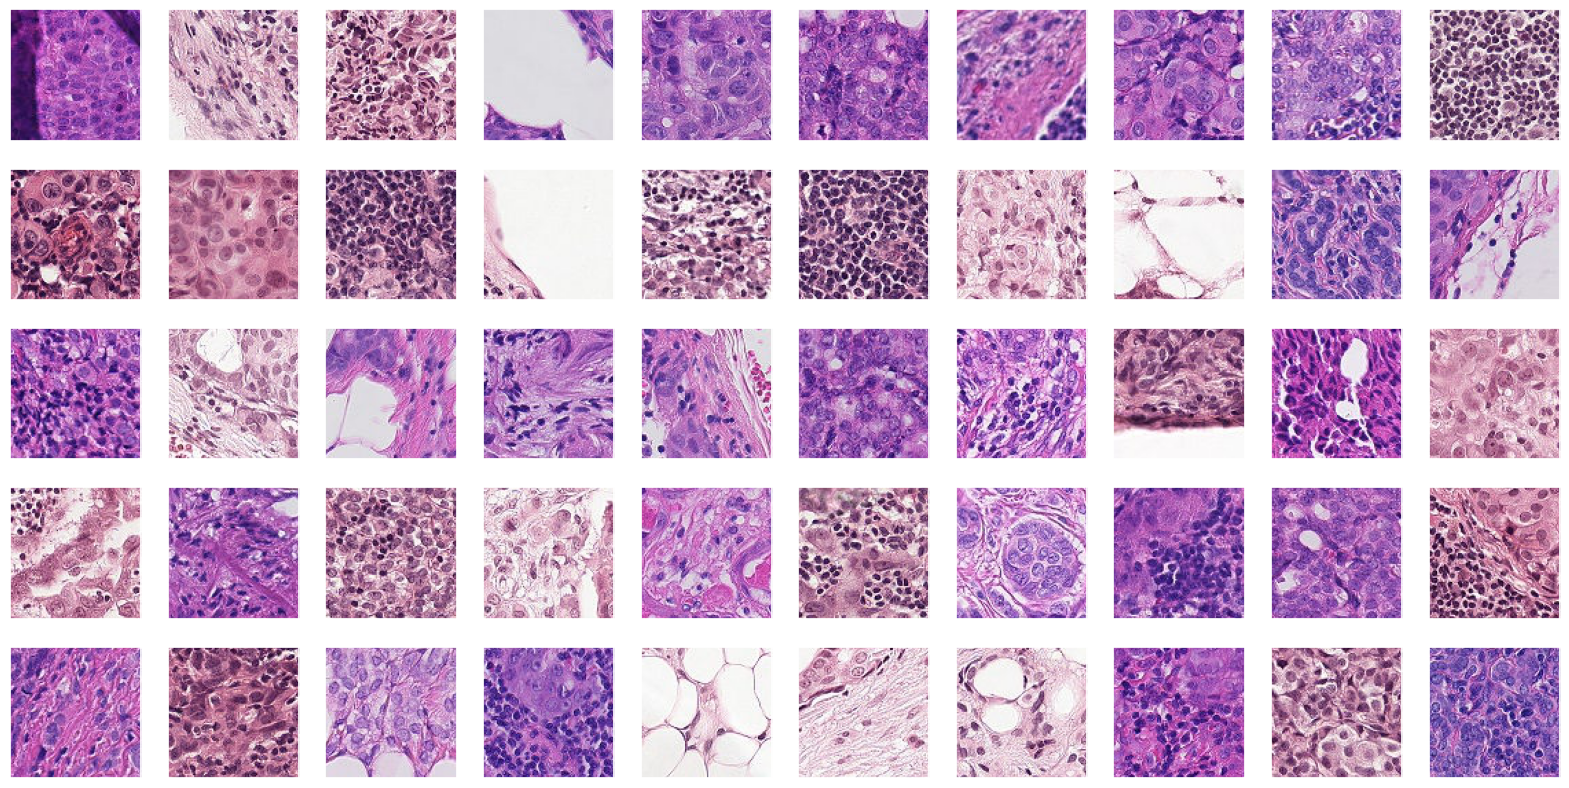

In [17]:
# Malignant cases
fig, ax = plt.subplots(5, 10, figsize=(20,10))

for n in range(5):
    for m in range(10):
        img_id = positive_images[m + n*10]
        image = Image.open(train_path + img_id + ".tif")
        ax[n,m].imshow(image)
        ax[n,m].grid(False)
        ax[n,m].tick_params(labelbottom=False, labelleft=False)

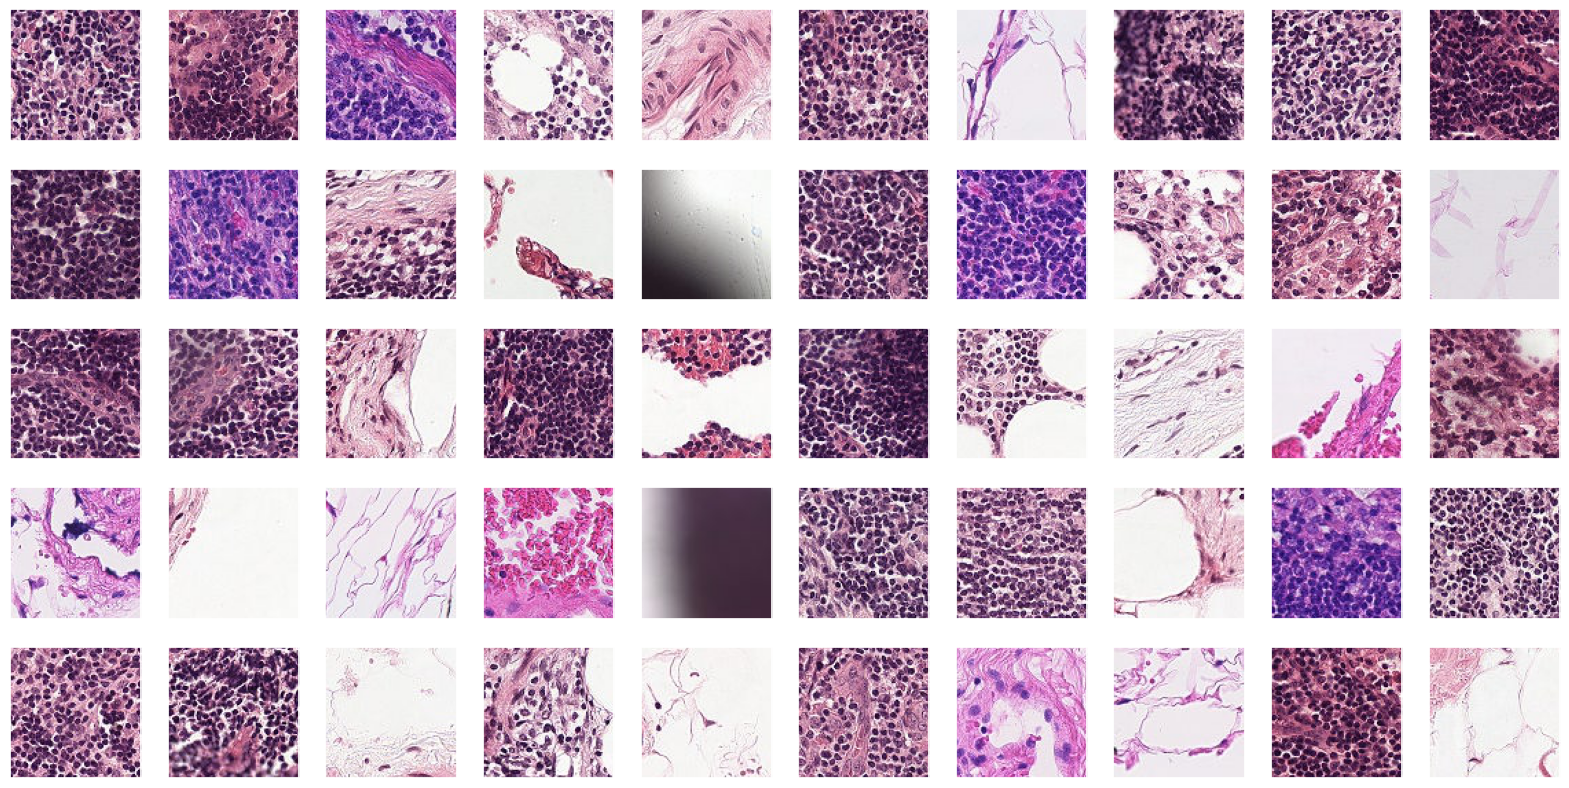

In [18]:
# Benign cases
fig, ax = plt.subplots(5, 10, figsize=(20,10))

for n in range(5):
    for m in range(10):
        img_id = negative_images[m + n*10]
        image = Image.open(train_path + img_id + ".tif")
        ax[n,m].imshow(image)
        ax[n,m].grid(False)
        ax[n,m].tick_params(labelbottom=False, labelleft=False)

The images are 96x96 <br>
The training set is not split into training and validation, so we will have to do that. It is about a 60/40 split of data labeled with the presence (1) or absence (0) of cancer. <br>
There are 220000 images in the training set.<br>
Identifying malignant vs benign is not easy by sight, expert opinion needed 


### Data Preprocessing


In [19]:
# Function for generating the correct file name
def generate_file_names(id):
    return train_path+str(id)+".tif"

In [20]:
# Add the filepath for the image to the 'labels' dataframe
labels["label"] = labels["label"].astype(str)
print(labels)
print(labels.describe())
labels["filepath"] = labels["id"].apply(generate_file_names)

labels.head()

                                              id label
0       f38a6374c348f90b587e046aac6079959adf3835     0
1       c18f2d887b7ae4f6742ee445113fa1aef383ed77     1
2       755db6279dae599ebb4d39a9123cce439965282d     0
3       bc3f0c64fb968ff4a8bd33af6971ecae77c75e08     0
4       068aba587a4950175d04c680d38943fd488d6a9d     0
...                                          ...   ...
220020  53e9aa9d46e720bf3c6a7528d1fca3ba6e2e49f6     0
220021  d4b854fe38b07fe2831ad73892b3cec877689576     1
220022  3d046cead1a2a5cbe00b2b4847cfb7ba7cf5fe75     0
220023  f129691c13433f66e1e0671ff1fe80944816f5a2     0
220024  a81f84895ddcd522302ddf34be02eb1b3e5af1cb     1

[220025 rows x 2 columns]
                                              id   label
count                                     220025  220025
unique                                    220025       2
top     f38a6374c348f90b587e046aac6079959adf3835       0
freq                                           1  130908


id label  \
0  f38a6374c348f90b587e046aac6079959adf3835     0   
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77     1   
2  755db6279dae599ebb4d39a9123cce439965282d     0   
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08     0   
4  068aba587a4950175d04c680d38943fd488d6a9d     0   

                                            filepath  
0  /Users/alyso/Downloads/histopathologic-cancer-...  
1  /Users/alyso/Downloads/histopathologic-cancer-...  
2  /Users/alyso/Downloads/histopathologic-cancer-...  
3  /Users/alyso/Downloads/histopathologic-cancer-...  
4  /Users/alyso/Downloads/histopathologic-cancer-...

In [21]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Split the training data into a training and a validation set. Split the data into 80% training and 20% validation
train, val = train_test_split(labels, stratify=labels.label, test_size=0.2)
print(len(train), len(val))
val.head()

176020 44005


id label  \
132868  d9e5fbd7eb80f755fe984d75f786b728c97102a8     1   
48970   aefaaec7c321e52f89ea690c36fe7b1de595e65d     0   
50044   d6d257869d4f6ef1ab2af5f41c17b83234334fdd     0   
74457   d9e056cc980e5ae1c7d6eff3147cb7001b731995     0   
24992   2ffafb39219e7ce490113010bb44dc10d76f4af4     1   

                                                 filepath  
132868  /Users/alyso/Downloads/histopathologic-cancer-...  
48970   /Users/alyso/Downloads/histopathologic-cancer-...  
50044   /Users/alyso/Downloads/histopathologic-cancer-...  
74457   /Users/alyso/Downloads/histopathologic-cancer-...  
24992   /Users/alyso/Downloads/histopathologic-cancer-...

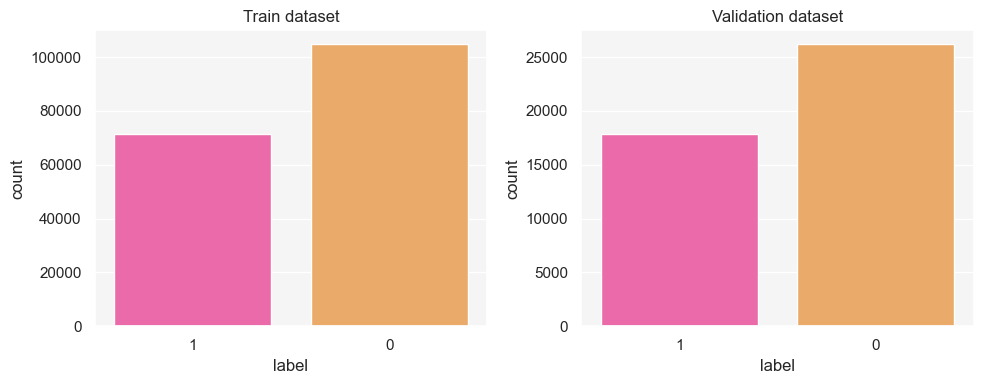

In [22]:

# Visualize the distribution of the malignant and benign cases in the training and validation sets to make sure it looks even
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(x='label', data=train, palette="spring", ax=ax[0], hue='label')
ax[0].set_title("Train dataset")

sns.countplot(x='label', data=val, palette="spring", ax=ax[1], hue='label')
ax[1].set_title("Validation dataset")

plt.tight_layout()
plt.show()


In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model
import json


In [24]:
# Create the data_generator function with rescale
data_generator = ImageDataGenerator(rescale=1.0/225)

In [25]:
# Create the training and validation generators
train_generator = data_generator.flow_from_dataframe(
    dataframe=train,
    x_col="filepath",
    y_col="label",
    target_size=(96, 96),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary"
)

validation_generator = data_generator.flow_from_dataframe(
    dataframe=val,
    x_col="filepath",
    y_col="label",
    target_size=(96, 96),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary"
)



Found 176020 validated image filenames belonging to 2 classes.
Found 44005 validated image filenames belonging to 2 classes.


In [26]:
# Set variables and create the test generator for model evaluation
test_ids = [filename[:-4] for filename in os.listdir(test_path)]
test_filepath = [os.path.join(test_path, filename) for filename in os.listdir(test_path)]
test_df = pd.DataFrame()
test_df["id"] = test_ids
test_df["filepath"] = test_filepath

test_generator = data_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col="filepath",
    y_col=None,
    target_size=(96, 96),
    color_mode="rgb",
    batch_size=32,
    shuffle=False,
    class_mode=None
)

Found 57458 validated image filenames.


In [27]:
# Helper function that will be used to plot the validation loss, accuracy, and AUC for each trained model.
def plot_history(history):

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.plot(np.arange(1, len(history["loss"]) + 1), history["loss"], label="train")
    plt.plot(np.arange(1, len(history["val_loss"]) + 1), history["val_loss"], label="validation")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(np.arange(1, len(history["accuracy"]) + 1), history["accuracy"], label="train")
    plt.plot(np.arange(1, len(history["val_accuracy"]) + 1), history["val_accuracy"], label="validation")
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(np.arange(1, len(history["AUC"]) + 1), history["AUC"], label="train")
    plt.plot(np.arange(1, len(history["val_AUC"]) + 1), history["val_AUC"], label="validation")
    plt.title('Model AUC')
    plt.ylabel('AUC')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [61]:
# Helper function to generate a csv output file
def make_output_csv(model, test_generator, folder_path):
    """
    Generate CSV file containing test labels predicted by the model.

    Args:
    - model: Trained Keras model.
    - test_generator: Data generator for test dataset.
    - folder_path: Path to the folder where test labels CSV file will be saved.
    """
    # Check if folder_path exists, if not, create it
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    test_probs = model.predict(test_generator)
    test_labels = np.round(test_probs).astype(int).flatten()
    out_df = pd.DataFrame({"id": test_ids, "label": test_labels})
    out_df.to_csv(os.path.join(folder_path, "test_labels.csv"), index=False)

In [29]:
# Helper function to get the best metric for each trained model
def get_best_metrics(history):
    """
    Get the best metrics (epoch, loss, accuracy, AUC) from the training history.

    Args:
    - history: Training history dictionary containing loss, accuracy, and AUC values.

    Returns:
    - Tuple of best epoch, best loss, best accuracy, and best AUC.
    """

    best_epoch = np.argmin(history["val_loss"]) + 1
    best_loss = min(history["val_loss"])
    best_accuracy = max(history["val_accuracy"])
    best_auc = max(history["val_AUC"])
    
    return best_epoch, best_loss, best_accuracy, best_auc

## Step Three: Model Architecture

**Describe your model architecture and reasoning for why you believe that specific architecture would be suitable for this problem. Compare multiple architectures and tune hyperparameters.**

In [30]:
import os
import shutil
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

I'll start with a function that is going to finalize each model, defining the loss function, optimizer and metrics

In [31]:
def finalize_model(model, LR):
    model.compile(loss = 'binary_crossentropy', 
                  optimizer = tf.keras.optimizers.Adam(learning_rate = LR),
                  metrics=['accuracy', 'AUC'])
    model.summary()
    return model

#### Basic Convolutional Model
I'll start with a basic convulitional model with the following architecture:
- **Input Layer**: The input shape is (96, 96, 3), images with a height and width of 96 pixels and 3 channels (RGB)
- **Convolutional Layers**: The first 'Convo2D' layer has 32 filters of size (3,3) and uses ReLU activation. This layer extracts 32 different features from the input images. The second convolutional latyer has 64 filters of size (3,3) and uses ReLU activation. This layer further extracts 64 different features from the input.
- **Max Pooling Layer**: After each convolutional layer, a max-pooling layer with a pool size of (2, 2) is applied to reduce the spatial dimensions of the feature maps by half.
- **Flattening Layer**: The output of the last convolutional layer is flattened into a 1D array. This is required to connect the convolutional layers to the dense layers.
- **Dense Layers**: Two fully connected dense layers follow the flattened layer with 256 and 128 neurons and ReLU activation functions. These layers perfom classification based on the features extracted by the convolutional layers.
- **Output Layer**: The output layer is a single neuron with a sigmoid activation suitable for binary classification tasks. The output is the probability of the input image belonging to a certain class.
- **Finalization**: The function 'finalize_model()' is called to compile and finalize the model.

In [32]:
# Function to create the basic convolutional model
def create_basic_conv_model(modelName='', LR = 0.001):
    if modelName != '':
        model = Sequential(modelName)
    else:
        model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    return finalize_model(model, LR)

In [37]:
# Function to train the model with the generator data, return metrics
def train_model(model, train_gen, validation_gen, test_gen, numEpochs = 10):
    np.random.seed(0)
    tf.random.set_seed(0)
    early_stopping = EarlyStopping(monitor="val_loss", patience=3, verbose=1)

    history = model.fit(train_gen, validation_data=validation_gen,
                            epochs=numEpochs, steps_per_epoch = 550, 
                            callbacks=[early_stopping]).history
    return history

In [38]:
# The first model uses a learning rate of 0.001
model_1 = create_basic_conv_model()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 94, 94, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 92, 92, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 135424)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │    34,668,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,721,217 (132.45 MB)

 Trainable params: 34,721,217 (132.45 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
basic_model = train_model(model_1, train_generator, validation_generator, test_generator, numEpochs = 10)

Epoch 1/10
  9/550 ━━━━━━━━━━━━━━━━━━━━ 4:02 447ms/step - AUC: 0.4406 - accuracy: 0.4049 - loss: 5.7994

550/550 ━━━━━━━━━━━━━━━━━━━━ 488s 886ms/step - AUC: 0.6438 - accuracy: 0.6032 - loss: 0.9300 - val_AUC: 0.7463 - val_accuracy: 0.6811 - val_loss: 0.5981
Epoch 2/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 308s 560ms/step - AUC: 0.7977 - accuracy: 0.7291 - loss: 0.5376 - val_AUC: 0.6939 - val_accuracy: 0.6607 - val_loss: 0.6409
Epoch 3/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 553s 1s/step - AUC: 0.7950 - accuracy: 0.7292 - loss: 0.5361 - val_AUC: 0.8241 - val_accuracy: 0.7509 - val_loss: 0.5119
Epoch 4/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 352s 640ms/step - AUC: 0.8304 - accuracy: 0.7577 - loss: 0.5004 - val_AUC: 0.8433 - val_accuracy: 0.7574 - val_loss: 0.4936
Epoch 5/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 339s 618ms/step - AUC: 0.8565 - accuracy: 0.7827 - loss: 0.4608 - val_AUC: 0.8354 - val_accuracy: 0.7635 - val_loss: 0.5000
Epoch 6/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 320s 583ms/step - AUC: 0.8631 - accuracy: 0.7926 - loss: 0.4508 - val_AUC: 0.8760 - val_accuracy: 0.7813 - val_loss: 0.4660
Epoch 7/10
550/550 ━━━━━━━━━━━

In [40]:
# Check that the keys are as expected
basic_model.keys()

dict_keys(['AUC', 'accuracy', 'loss', 'val_AUC', 'val_accuracy', 'val_loss'])

In [41]:
# See the best metrics
modelMetrics = get_best_metrics(basic_model)
print(f"Best Epoch: {modelMetrics[0]}")
print(f"Best Model Loss: {modelMetrics[1]}")
print(f"Best Model Accuracy: {modelMetrics[2]}")
print(f"Best Model AUC: {modelMetrics[3]}")

Best Epoch: 10
Best Model Loss: 0.4083501994609833
Best Model Accuracy: 0.816634476184845
Best Model AUC: 0.8909682035446167


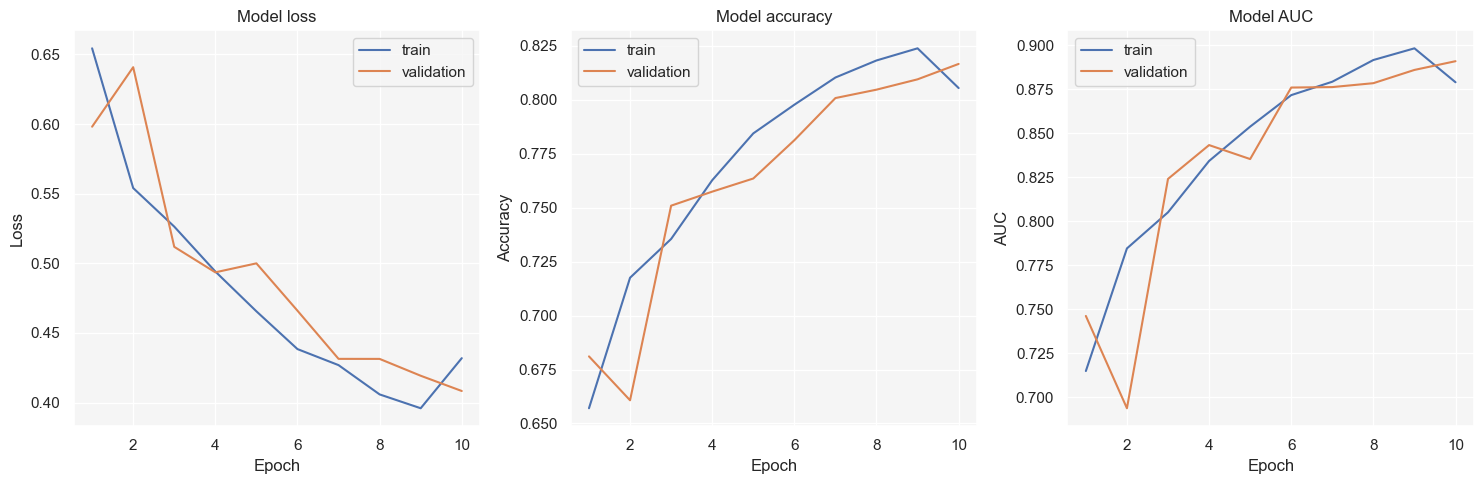

In [42]:
# Visualize the metrics
plot_history(basic_model)

#### Model with Dropout
Next, I'll iterate on the previous model by adding dropout regularization to the fully connected layers. Dropout regularization is a technique used to prevent over fitting by randomly setting a fraction of inputs to 0 during training.
- **Dropout Layer**: After the first dense layer with 256 neurons, a droput layer with a dropout rate of 0.5 is added. This means that during training, 50% of the inputs will be randomly set to 0 at each update, helping to prevent overfitting.

In [44]:
def model_with_dropout(modelName='', LR = 0.001):
    if modelName != '':
        model = Sequential(modelName)
    else:
        model = Sequential()
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    return finalize_model(model, LR)


In [45]:
model_2 = model_with_dropout()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 94, 94, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 92, 92, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 135424)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │    34,668,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,721,217 (132.45 MB)

 Trainable params: 34,721,217 (132.45 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
basic_with_dropout = train_model(model_2, train_generator, validation_generator, test_generator, numEpochs = 10)

Epoch 1/10


550/550 ━━━━━━━━━━━━━━━━━━━━ 753s 1s/step - AUC: 0.6186 - accuracy: 0.6003 - loss: 0.8403 - val_AUC: 0.7841 - val_accuracy: 0.7243 - val_loss: 0.5629
Epoch 2/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 324s 589ms/step - AUC: 0.7694 - accuracy: 0.7150 - loss: 0.5648 - val_AUC: 0.8344 - val_accuracy: 0.7581 - val_loss: 0.4969
Epoch 3/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 320s 582ms/step - AUC: 0.8205 - accuracy: 0.7532 - loss: 0.5098 - val_AUC: 0.8459 - val_accuracy: 0.7684 - val_loss: 0.4913
Epoch 4/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 479s 871ms/step - AUC: 0.8467 - accuracy: 0.7780 - loss: 0.4794 - val_AUC: 0.8658 - val_accuracy: 0.7502 - val_loss: 0.5184
Epoch 5/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 313s 569ms/step - AUC: 0.8546 - accuracy: 0.7864 - loss: 0.4680 - val_AUC: 0.8705 - val_accuracy: 0.7914 - val_loss: 0.4493
Epoch 6/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 1411s 3s/step - AUC: 0.8677 - accuracy: 0.7972 - loss: 0.4437 - val_AUC: 0.8792 - val_accuracy: 0.8080 - val_loss: 0.4272
Epoch 7/10
550/550 ━━━━━━━━━━━━━

In [47]:
model_2_metrics = get_best_metrics(basic_with_dropout)
print(f"Best Epoch: {model_2_metrics[0]}")
print(f"Best Model Loss: {model_2_metrics[1]}")
print(f"Best Model Accuracy: {model_2_metrics[2]}")
print(f"Best Model AUC: {model_2_metrics[3]}")

Best Epoch: 10
Best Model Loss: 0.38484135270118713
Best Model Accuracy: 0.8299511671066284
Best Model AUC: 0.9070596098899841


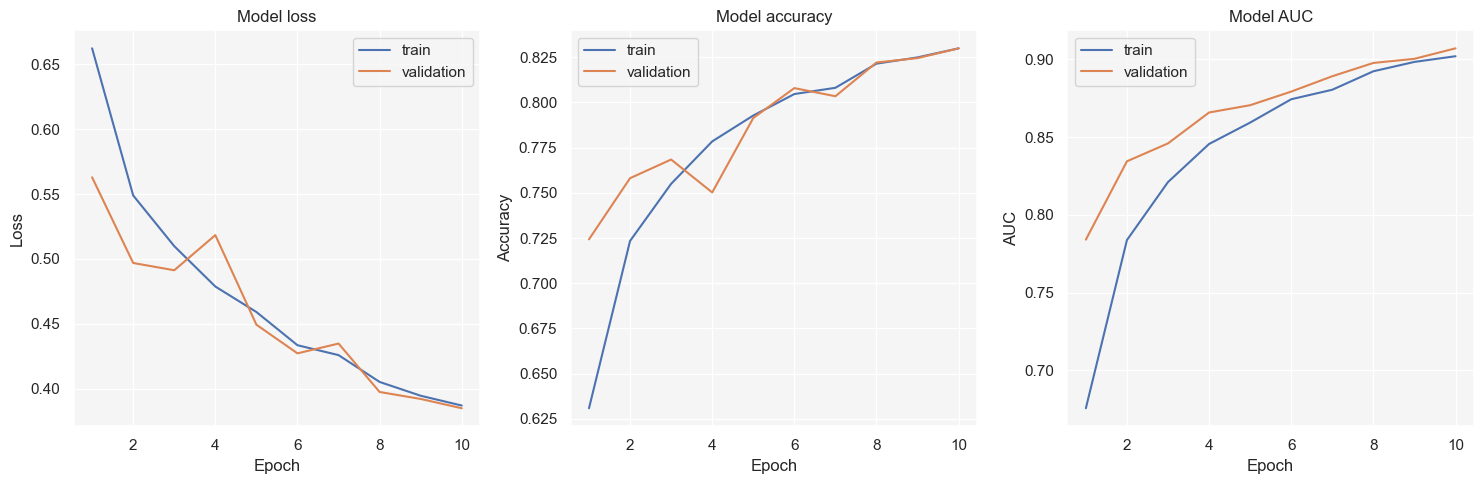

In [48]:
plot_history(basic_with_dropout)

#### Model with Max Pooling
Next, I'll iterate on the model again by adding max-pooling layers. These are typically used in CNN architectures to reduce the spatial dimensions of the feature maps, which helps in controlling overfitting and reducing computational complexity. In this iteration, an additional max-pooling layer is added.

In [49]:
def model_with_maxpool(modelName='', LR = 0.001):
    if modelName != '':
        model = Sequential(modelName)
    else:
        model = Sequential()
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    return finalize_model(model, LR)

In [50]:
model_3 = model_with_maxpool()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 94, 94, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │     7,930,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,982,529 (30.45 MB)

 Trainable params: 7,982,529 (30.45 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:

basic_with_maxpool = train_model(model_3, train_generator, validation_generator, test_generator, numEpochs=10)

Epoch 1/10


550/550 ━━━━━━━━━━━━━━━━━━━━ 141s 254ms/step - AUC: 0.6452 - accuracy: 0.6036 - loss: 0.6771 - val_AUC: 0.8570 - val_accuracy: 0.7470 - val_loss: 0.5143
Epoch 2/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 137s 248ms/step - AUC: 0.8428 - accuracy: 0.7818 - loss: 0.4810 - val_AUC: 0.8608 - val_accuracy: 0.7889 - val_loss: 0.4586
Epoch 3/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 138s 250ms/step - AUC: 0.8519 - accuracy: 0.7843 - loss: 0.4688 - val_AUC: 0.8556 - val_accuracy: 0.7874 - val_loss: 0.4651
Epoch 4/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 135s 245ms/step - AUC: 0.8672 - accuracy: 0.7970 - loss: 0.4485 - val_AUC: 0.8602 - val_accuracy: 0.7889 - val_loss: 0.4584
Epoch 5/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 132s 240ms/step - AUC: 0.8698 - accuracy: 0.8045 - loss: 0.4427 - val_AUC: 0.8849 - val_accuracy: 0.8097 - val_loss: 0.4361
Epoch 6/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 134s 244ms/step - AUC: 0.8747 - accuracy: 0.8111 - loss: 0.4328 - val_AUC: 0.8867 - val_accuracy: 0.8133 - val_loss: 0.4201
Epoch 7/10
550/550 ━━━━━━━━

In [52]:
model_3_metrics = get_best_metrics(basic_with_maxpool)
print(f"Best Epoch: {model_3_metrics[0]}")
print(f"Best Model Loss: {model_3_metrics[1]}")
print(f"Best Model Accuracy: {model_3_metrics[2]}")
print(f"Best Model AUC: {model_3_metrics[3]}")

Best Epoch: 10
Best Model Loss: 0.37898772954940796
Best Model Accuracy: 0.8341097831726074
Best Model AUC: 0.9144451022148132


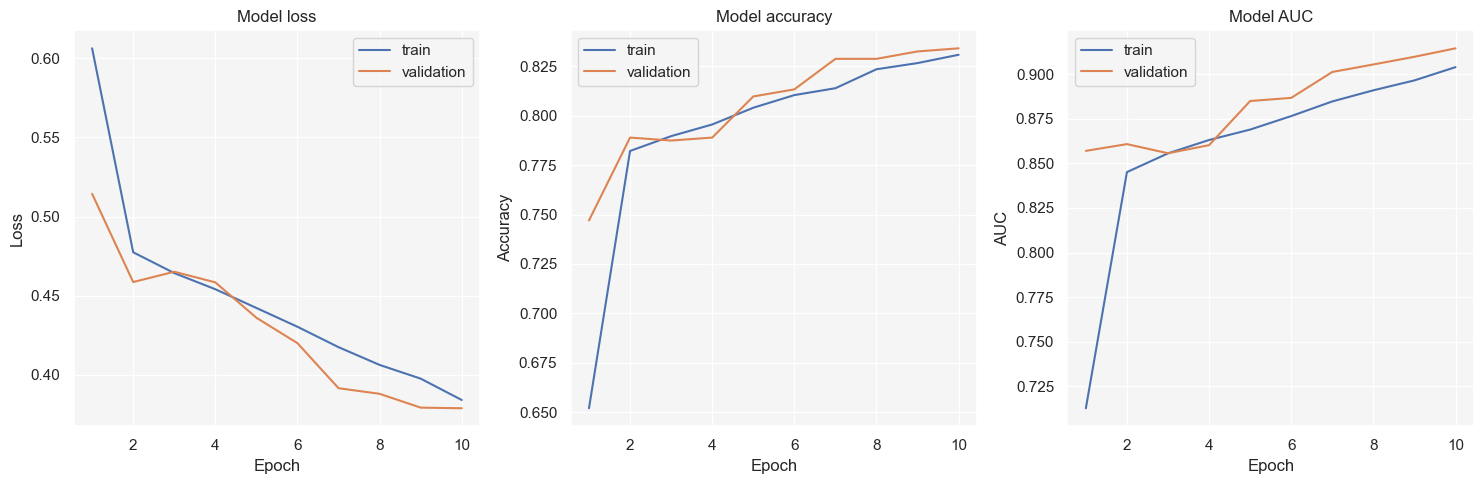

In [53]:
plot_history(basic_with_maxpool)

Next, I'll increase the complexity of the CNN architecture. 
- This architecture includes multiple pairs of convolutional layers with increasing numbers of filters. Each pair consists of two convolutional layers with 32, 64, and 128 filters, respectively. This allows the network to learn hierarchical features at different levels of abstraction. 
- Batch normalization  layers are added after each pair of convolutional layers. Batch normalization helps stabilize the learning process and allows for higher learning rates. It normalizes the activations of each layer, making the optimization process more efficient.<br><br>

The overall architecture consists of multiple convolutional layers with batch normalization, followed by fully connected layers. The output layer is a single neuron with sigmoid activation for binary classification.
Finally, the model is compiled and finalized with the provided learning rate, similar to the previous iterations.

In [54]:
def intermediate_model(LR = 0.0005):
    model = Sequential()
    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification    
    return finalize_model(model, LR)

In [55]:
model_4 = intermediate_model()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 94, 94, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 92, 92, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 92, 92, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 46, 46, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 42, 42, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 42, 42, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 19, 19, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 17, 17, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 17, 17, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,483,233 (17.10 MB)

 Trainable params: 4,482,785 (17.10 MB)

 Non-trainable params: 448 (1.75 KB)

In [56]:
int_model = train_model(model_4, train_generator, validation_generator, test_generator, numEpochs=10)

Epoch 1/10


550/550 ━━━━━━━━━━━━━━━━━━━━ 257s 461ms/step - AUC: 0.7866 - accuracy: 0.7396 - loss: 0.8632 - val_AUC: 0.8066 - val_accuracy: 0.6965 - val_loss: 0.5637
Epoch 2/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 261s 475ms/step - AUC: 0.8799 - accuracy: 0.8149 - loss: 0.4329 - val_AUC: 0.7669 - val_accuracy: 0.5950 - val_loss: 1.9442
Epoch 3/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 266s 483ms/step - AUC: 0.8940 - accuracy: 0.8266 - loss: 0.4114 - val_AUC: 0.8470 - val_accuracy: 0.7009 - val_loss: 0.6637
Epoch 4/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 263s 479ms/step - AUC: 0.9076 - accuracy: 0.8348 - loss: 0.3787 - val_AUC: 0.9057 - val_accuracy: 0.8364 - val_loss: 0.3850
Epoch 5/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 265s 482ms/step - AUC: 0.9085 - accuracy: 0.8446 - loss: 0.3727 - val_AUC: 0.9276 - val_accuracy: 0.8235 - val_loss: 0.3747
Epoch 6/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 258s 470ms/step - AUC: 0.9251 - accuracy: 0.8560 - loss: 0.3439 - val_AUC: 0.9276 - val_accuracy: 0.8355 - val_loss: 0.3811
Epoch 7/10
550/550 ━━━━━━━━

In [57]:
model_4_metrics = get_best_metrics(int_model)
print(f"Best Epoch: {model_4_metrics[0]}")
print(f"Best Model Loss: {model_4_metrics[1]}")
print(f"Best Model Accuracy: {model_4_metrics[2]}")
print(f"Best Model AUC: {model_4_metrics[3]}")

Best Epoch: 5
Best Model Loss: 0.3747231662273407
Best Model Accuracy: 0.8492217063903809
Best Model AUC: 0.9275918006896973


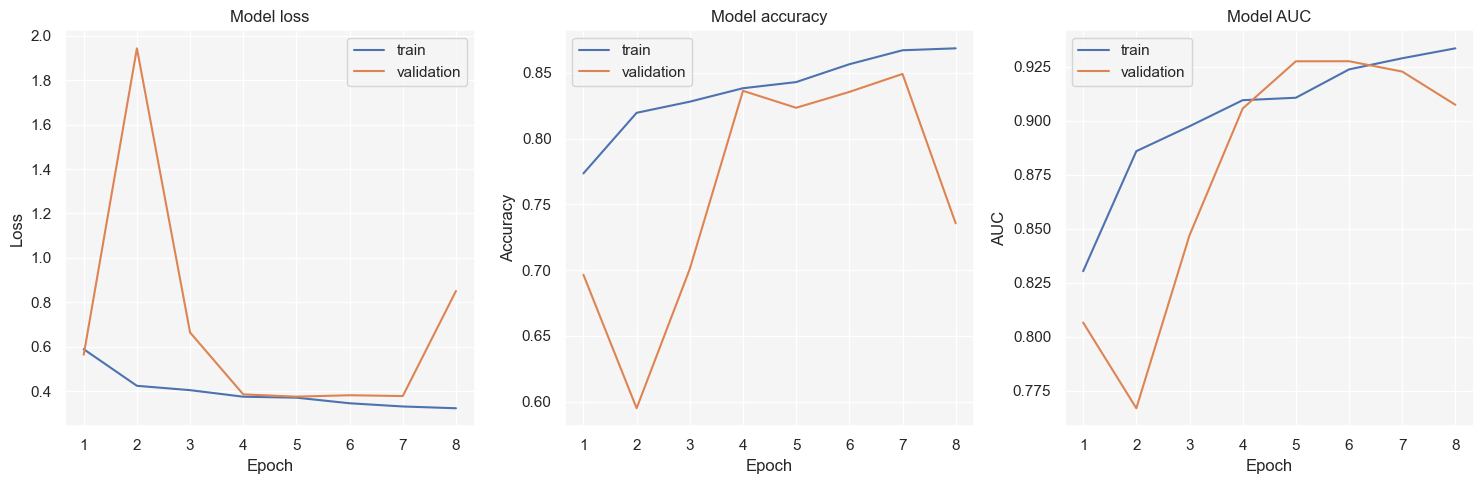

In [58]:
plot_history(int_model)

In [64]:
make_output_csv(model_1, test_generator, "model_1.csv")
make_output_csv(model_2, test_generator, "model_2.csv")
make_output_csv(model_3, test_generator, "model_3.csv")
make_output_csv(model_4, test_generator, "model_4.csv")

  16/1796 ━━━━━━━━━━━━━━━━━━━━ 1:27 49ms/step

1796/1796 ━━━━━━━━━━━━━━━━━━━━ 85s 47ms/step
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 55s 30ms/step
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 101s 56ms/step


## Step Four: Results and Analysis
**Run hyperparameter tuning, try different architectures for comparison, apply techniques to improve training or performance, and discuss what helped. Include results with tables and figures. Include an analysis of why or why not something worked well, troubleshooting, and a hyperparameter optimization procedure summary.**

#### Summary of Results
Overall, the basic convolutional model with dropout performed the best. While the last model performed the best on the validation set, it did not generalize well to unseen data given it performed worst on the test set. 

In [65]:
# Create a dataframe for storing resuts
results_df = pd.DataFrame(columns=["Model Name", "Validation Loss", "Validation Accuracy", "Validation AUC", "Test score"])

In [68]:
# Model scores are from Kaggle submission. Add metrics for each model into results dataframe 
model_1_test_score = 0.7215
results_df.loc[len(results_df.index)] = ["First Model", modelMetrics[1], modelMetrics[2], modelMetrics[3], model_1_test_score]
model_2_test_score = 0.7707
results_df.loc[len(results_df.index)] = ["Model with Dropout", model_2_metrics[1], model_2_metrics[2], model_2_metrics[3], model_2_test_score]
model_3_test_score = 0.7640
results_df.loc[len(results_df.index)] = ["Model with Max Pool", model_3_metrics[1], model_3_metrics[2], model_3_metrics[3], model_3_test_score]
model_4_test_score = 0.6007
results_df.loc[len(results_df.index)] = ["Model 4", model_4_metrics[1], model_4_metrics[2], model_4_metrics[3], model_4_test_score]


In [73]:
results_df

Model Name  Validation Loss  Validation Accuracy  Validation AUC  \
4          First Model         0.408350             0.816634        0.890968   
5   Model with Dropout         0.384841             0.829951        0.907060   
6  Model with Max Pool         0.378988             0.834110        0.914445   
7              Model 4         0.374723             0.849222        0.927592   

  Test score  
4     0.7215  
5     0.7707  
6      0.764  
7     0.6007

#### Hyperparameter tuning

The following hyperparameters were tuned over the course of developing the models, either choosing to include or omit, or trying a variety of values.
**Learning Rate**: This hyperparameter controls the step size or rate at which the model's parameters are updated during training. It is a critical hyperparameter to tune and can greatly affect the training process. Higher learning rate was causing the loss function to oscilate over time and prevented convergence. Lower learning rate was causng the model to take a very long time to train.<br>

**Batch Size**: This hyperparameter defines the number of samples processed before the model's parameters are updated during training. Smaller batch sizes made training time longer.

**Number of Epochs**: The number of epochs determines how many times the entire training dataset is passed forward and backward through the model during training. Lower numbers of epochs didn't give the model enough time to converge, and in higher number of epochs the model was more prone to overfitting.

**Dropout Rate**: In neural networks, dropout is a regularization technique. The dropout rate is a hyperparameter controlling the probability of neurons being randomly dropped during training

**Batch Normalization Parameters**: Parameters related to batch normalization layers, such as momentum and epsilon.


## Step Five: Conclusion
**Discuss and interpret results as well as learnings and takeaways. What did and did not help improve performance of your models? What improvements could you try in the future?**

The basic convolutional network and its iterations (models 1-3) performed better than the more complex CNN architecture in model 4. There are many reasons this could be the case, including overfitting due to several things. It would be useful to perform additional hyperparameter tuning with this model. Determining the best combination of batch size and learning rate would be a good way to tune parameters to reduce the overfitting. Additionally, the number and size of layers could be adapted to yield higher results.